# ML model 1 : Random Forests

In [69]:
import pandas as pd
import sklearn as sk 
import numpy as np
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
df = pd.read_csv('C:\\Users\\Sauraj (Work mode)\\Desktop\\winequality-red.csv')
df.head(20)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


### In this model, we are interested in predicting the quality of the wine on the basis of its features and chemical aspects
### To better understand the correlation, we need a regression plot


In [153]:
#Describe some basic info about the data
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,fsd,tsd,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [5]:
#Find the name of the columns
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [106]:
#Renaming the column for ease
df = df.rename(columns={'total sulfur dioxide' : 'tsd', 'free sulfur dioxide' : 'fsd'})
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,fsd,tsd,density,pH,sulphates,alcohol,quality,Train_values
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,True
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,False
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,True
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,False
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,True
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5,True
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.99640,3.30,0.46,9.4,5,False
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.99460,3.39,0.47,10.0,7,True
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.99680,3.36,0.57,9.5,7,False
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5,True


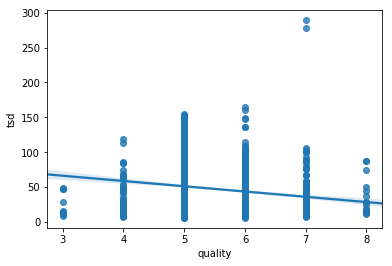

In [60]:
sns.regplot(df.quality, df.tsd)

# Training model
1. Our first step is to segregate the training dataset and testing dataset
2. Next we want to create the algorithm to start predicting

In [154]:
#Create training and testing datasets
#Segregates the train/test split randomly using .random.uniform method
df['Train_values'] = np.random.uniform(0, 1, len(df)) <= 0.60
df = df
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,fsd,tsd,density,pH,sulphates,alcohol,quality,Train_values
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,True
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,False
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,False
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,True
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,True


In [155]:
#New dataset for true values 
#New dataset for false values
t = df[df.Train_values == True]
f = df[df.Train_values == False]

In [168]:
#numpy classification array for training dataset 
x = np.array(t.quality)
x

array([5, 6, 5, 5, 7, 7, 5, 5, 5, 5, 5, 5, 7, 5, 4, 6, 6, 5, 5, 5, 6, 6,
       5, 6, 6, 4, 5, 5, 5, 5, 5, 5, 6, 5, 5, 5, 5, 5, 6, 5, 4, 5, 5, 4,
       5, 6, 5, 5, 5, 6, 5, 5, 6, 6, 5, 5, 5, 6, 5, 5, 6, 6, 6, 6, 5, 6,
       5, 5, 5, 5, 5, 5, 5, 6, 5, 5, 5, 5, 5, 6, 5, 5, 6, 4, 5, 5, 5, 5,
       5, 5, 6, 5, 6, 6, 5, 5, 6, 5, 5, 5, 5, 6, 5, 5, 5, 5, 5, 5, 5, 7,
       4, 7, 5, 5, 7, 5, 5, 7, 6, 6, 5, 6, 5, 5, 5, 5, 4, 6, 5, 7, 5, 6,
       6, 6, 6, 5, 6, 7, 7, 6, 5, 5, 6, 6, 6, 5, 5, 6, 5, 5, 4, 5, 5, 4,
       8, 6, 6, 5, 5, 5, 6, 6, 8, 7, 6, 7, 5, 6, 7, 5, 6, 5, 5, 5, 6, 6,
       5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 5, 6, 7, 5, 5, 6, 6, 7, 6, 5, 7, 6,
       5, 6, 6, 6, 5, 7, 6, 6, 5, 6, 6, 7, 7, 6, 5, 5, 7, 6, 5, 6, 6, 5,
       6, 6, 7, 6, 6, 6, 6, 6, 7, 6, 5, 7, 5, 6, 5, 5, 6, 6, 5, 6, 6, 4,
       6, 5, 5, 5, 5, 6, 5, 7, 6, 5, 6, 7, 5, 5, 5, 6, 6, 6, 5, 8, 6, 7,
       5, 5, 6, 5, 5, 7, 6, 5, 5, 5, 6, 5, 6, 6, 6, 5, 5, 6, 5, 5, 8, 5,
       5, 6, 7, 6, 6, 7, 7, 7, 7, 6, 7, 7, 5, 6, 5,

In [162]:
features = df.columns[:12]

In [169]:
print(len(t))
print(len(f))

963
636


# Random Forest training

In [170]:
clf = RandomForestClassifier(n_jobs = 2, random_state = 0)
clf.fit(t[features], x)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=2,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

# Applying classifier to test data

In [171]:
clf.predict(f[features])

array([5, 5, 5, 5, 5, 5, 6, 5, 5, 5, 6, 5, 7, 5, 5, 6, 5, 5, 5, 5, 6, 6,
       6, 5, 5, 5, 5, 5, 7, 5, 5, 6, 5, 5, 5, 6, 5, 5, 5, 6, 5, 5, 5, 6,
       5, 5, 5, 6, 6, 5, 5, 5, 5, 5, 6, 6, 5, 5, 7, 5, 6, 5, 5, 6, 5, 5,
       6, 6, 5, 5, 5, 6, 4, 6, 5, 5, 5, 5, 4, 6, 5, 5, 5, 5, 5, 6, 5, 5,
       6, 5, 6, 7, 6, 5, 5, 6, 5, 6, 6, 6, 5, 6, 6, 6, 6, 6, 6, 5, 5, 7,
       5, 5, 7, 6, 6, 6, 5, 7, 5, 6, 5, 7, 6, 6, 5, 5, 5, 6, 5, 5, 6, 7,
       6, 5, 6, 6, 6, 5, 7, 6, 7, 6, 6, 6, 6, 6, 5, 5, 5, 6, 7, 5, 5, 7,
       7, 6, 6, 5, 6, 6, 6, 7, 5, 5, 6, 6, 6, 7, 7, 5, 6, 5, 7, 7, 5, 7,
       6, 6, 6, 7, 7, 6, 6, 6, 6, 6, 7, 7, 5, 5, 5, 6, 6, 5, 6, 5, 6, 5,
       5, 6, 6, 6, 7, 7, 6, 6, 7, 5, 7, 6, 7, 7, 7, 6, 6, 5, 6, 6, 5, 5,
       5, 5, 5, 5, 5, 6, 5, 5, 6, 5, 6, 5, 6, 6, 5, 6, 6, 6, 5, 5, 6, 5,
       5, 5, 5, 5, 6, 6, 5, 4, 6, 4, 5, 5, 6, 5, 6, 5, 6, 5, 5, 6, 5, 5,
       5, 5, 6, 5, 6, 5, 5, 5, 7, 7, 5, 5, 5, 4, 6, 5, 5, 6, 6, 5, 5, 5,
       6, 5, 5, 5, 5, 5, 3, 5, 5, 5, 6, 6, 4, 4, 5,

In [167]:
clf.predict_proba(t[features])[0:11]

array([[0. , 0. , 1. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0.8, 0.1, 0.1],
       [0. , 0. , 1. , 0. , 0. , 0. ],
       [0. , 0. , 1. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 1. , 0. ],
       [0. , 0. , 0. , 0.2, 0.8, 0. ],
       [0. , 0. , 1. , 0. , 0. , 0. ],
       [0. , 0. , 1. , 0. , 0. , 0. ],
       [0. , 0. , 1. , 0. , 0. , 0. ],
       [0. , 0. , 1. , 0. , 0. , 0. ],
       [0. , 0. , 1. , 0. , 0. , 0. ]])

# Confusion Matrix

In [174]:
pd.crosstab(t['quality'], x, rownames=['Actual quality'], colnames=['Predicted quality'])

Predicted quality,3,4,5,6,7,8
Actual quality,,,,,,
3,5,0,0,0,0,0
4,0,30,0,0,0,0
5,0,0,405,0,0,0
6,0,0,0,386,0,0
7,0,0,0,0,127,0
8,0,0,0,0,0,10


# Feature importance

In [175]:
list(zip(t[features], clf.feature_importances_))

[('fixed acidity', 0.026885024604323026),
 ('volatile acidity', 0.04266342450555172),
 ('citric acid', 0.029169618594667733),
 ('residual sugar', 0.024791192665305255),
 ('chlorides', 0.026602077743731172),
 ('fsd', 0.02590871882084388),
 ('tsd', 0.03983869151386321),
 ('density', 0.03326965248698468),
 ('pH', 0.023826383009060367),
 ('sulphates', 0.03537111524058911),
 ('alcohol', 0.07587543488995149),
 ('quality', 0.6157986659251283)]